In [10]:
import torch
import torch.nn.functional as F
def my_kl_loss(p, q):
    res = p * (torch.log(p + 0.0001) - torch.log(q + 0.0001))
    return torch.mean(torch.sum(res, dim=-1))

In [21]:
p = F.softmax(torch.tensor([-1.0, 2.0, 3.0]), dim=-1)
print(p)
q = F.softmax(torch.tensor([3.0, 2.0, 1]), dim=-1)
my_kl_loss(p,q)

tensor([0.0132, 0.2654, 0.7214])


tensor(1.4704)

In [22]:
torch.cuda.is_available()

True

In [23]:
import torch

# 创建一个简单的计算图
x = torch.tensor([2.0], requires_grad=True)
y = x**2
z = y + 3

# 计算梯度并进行反向传播
loss = z.sum()
loss.backward(retain_graph=True)

# 输出梯度
print("First backward:")
print("Gradient of x:", x.grad)

# 再次进行反向传播，保留计算图
loss.backward(retain_graph=True)

# 输出梯度
print("\nSecond backward:")
print("Gradient of x:", x.grad)


First backward:
Gradient of x: tensor([4.])

Second backward:
Gradient of x: tensor([8.])


In [41]:
import torch
data = torch.load(r"D:\CODE\github\Anomaly-Transformer\0.tc")
data = data.reshape(16,25).numpy()
print(data.shape)

(16, 25)


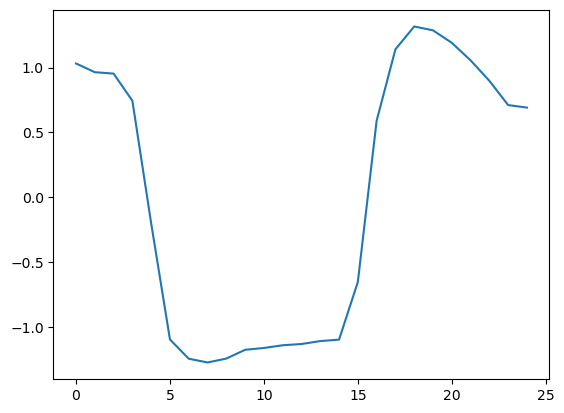

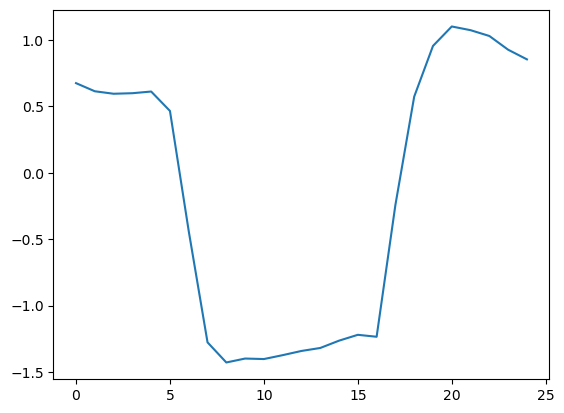

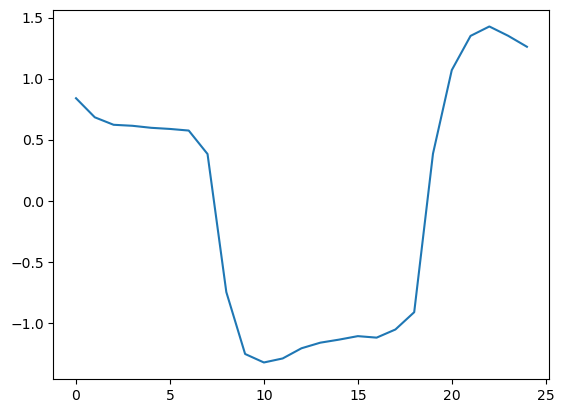

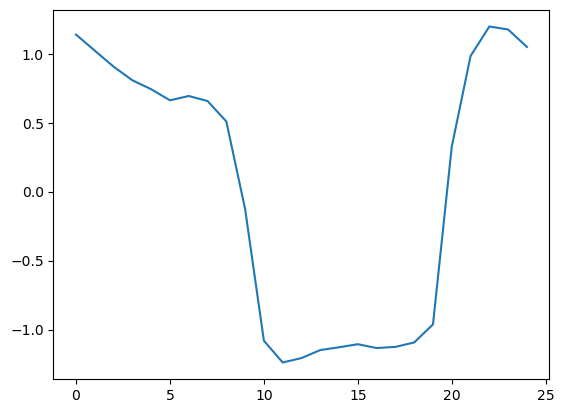

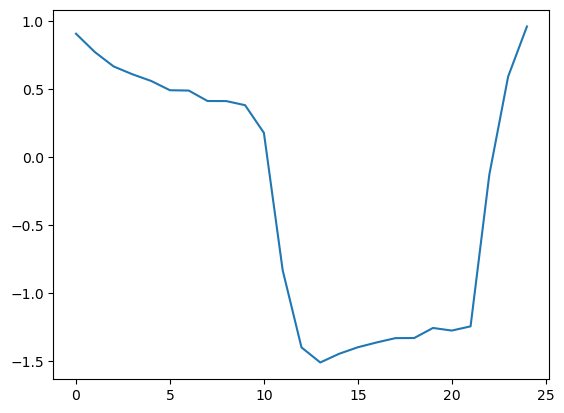

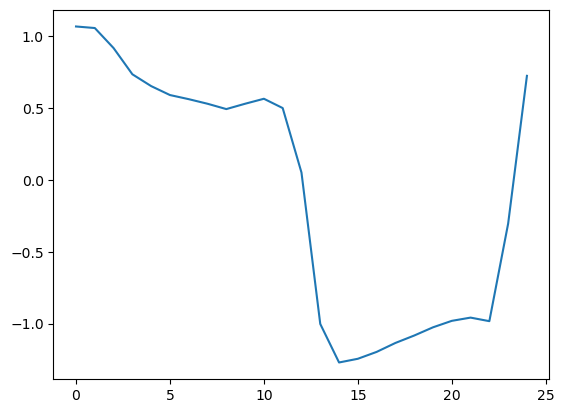

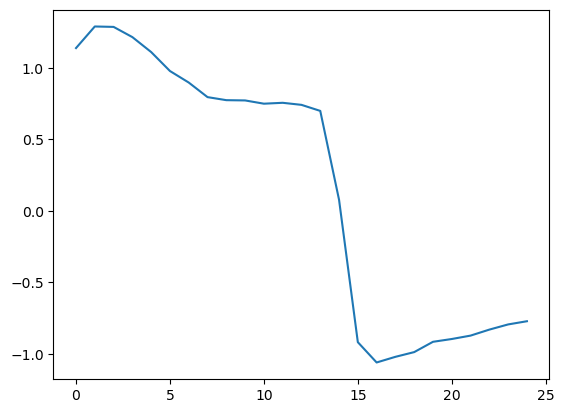

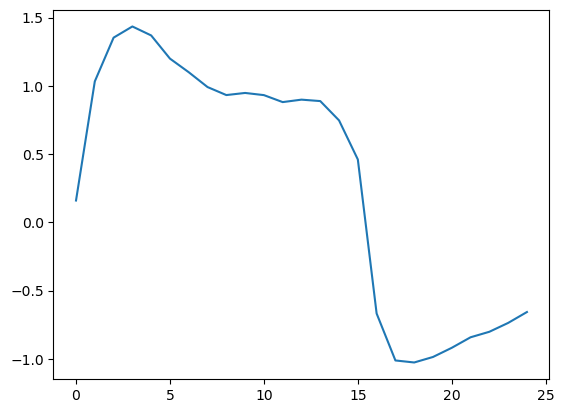

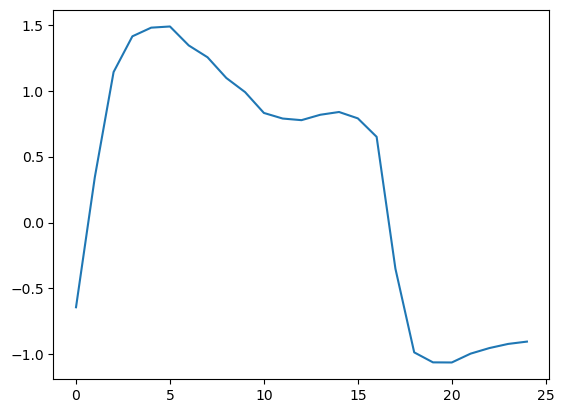

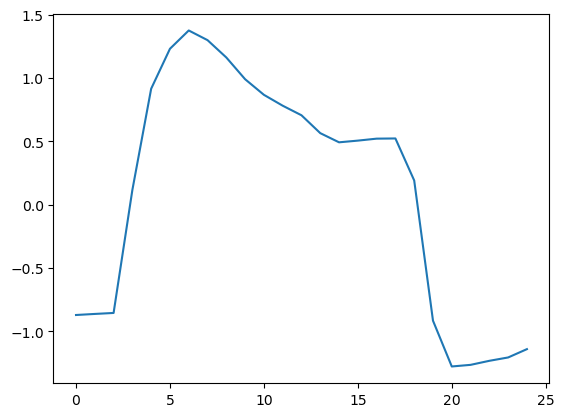

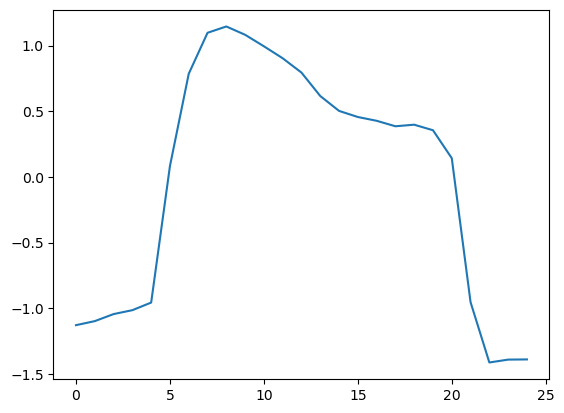

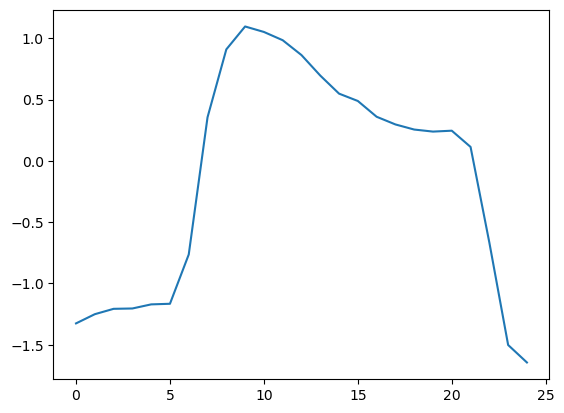

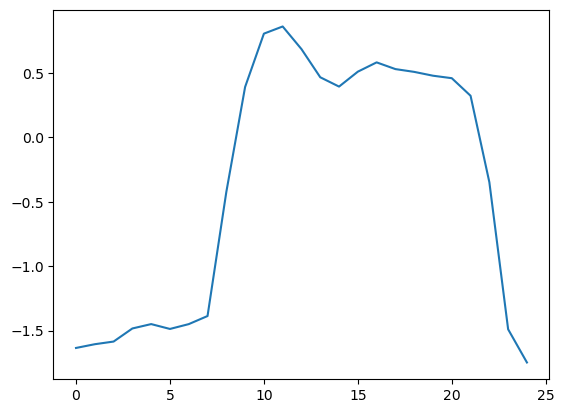

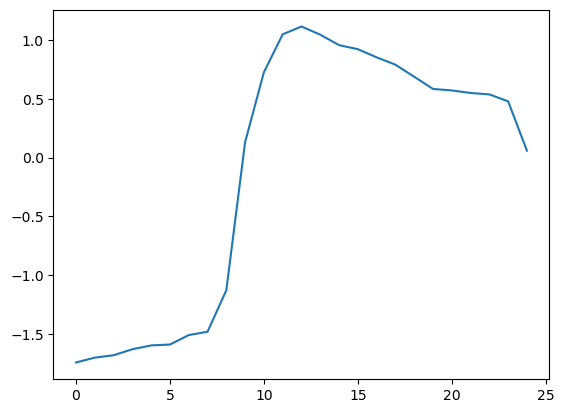

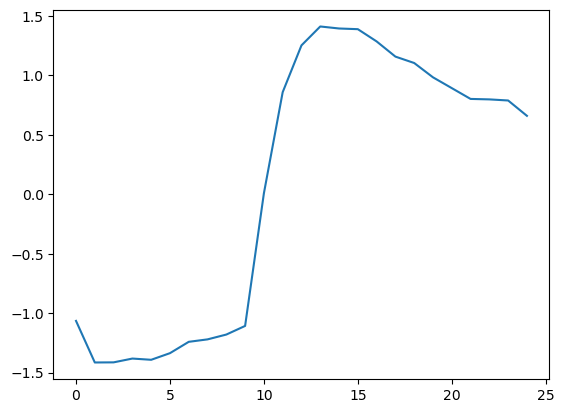

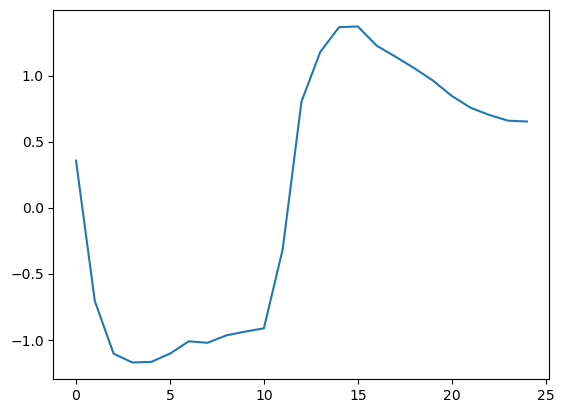

In [49]:
import matplotlib.pyplot as plt
for i in range(len(data)):
    plt.plot(data[i])
    plt.show()

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm
import math


class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=100000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x]

position_embedding = PositionalEmbedding(d_model=512)
pos = position_embedding(10)
pos.shape

torch.Size([1, 10, 512])

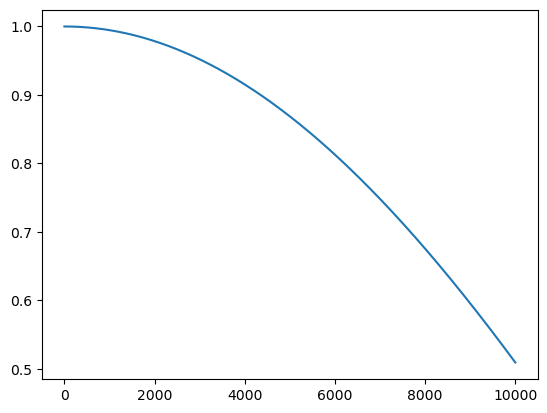

In [60]:
pos = position_embedding(10000)
plt.plot(pos[0,:,511])

In [61]:
import torch
import torch.nn as nn

# 定义输入数据（假设是一个包含三个时间步的一维时间序列）
# 通常在实际应用中，你会有一个更大的数据集
input_data = torch.randn(1, 1, 3)  # (batch_size, input_channels, sequence_length)

# 定义 Conv1d 层
# 输入通道数为1（一维时间序列），输出通道数为2，卷积核大小为3
conv1d_layer = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3)

# 将输入数据传递给卷积层
output_data = conv1d_layer(input_data)

# 打印输出数据和参数
print("输入数据：", input_data)
print("卷积层输出数据：", output_data)
print("卷积层权重：", conv1d_layer.weight)
print("卷积层偏置：", conv1d_layer.bias)


输入数据： tensor([[[-0.0591, -0.6337, -0.3551]]])
卷积层输出数据： tensor([[[0.0396],
         [0.0537]]], grad_fn=<ConvolutionBackward0>)
卷积层权重： Parameter containing:
tensor([[[-0.4238, -0.2776,  0.1283]],

        [[-0.2254, -0.0253,  0.3035]]], requires_grad=True)
卷积层偏置： Parameter containing:
tensor([-0.1157,  0.1322], requires_grad=True)


In [67]:
input_data[0]*conv1d_layer.weight[0]
torch.matmul(input_data[0],conv1d_layer.weight[1].T)+conv1d_layer.bias[1]

tensor([[0.0537]], grad_fn=<AddBackward0>)

In [68]:
import torch
import torch.nn as nn

# 定义输入数据（假设是一个包含两个特征的批次）
input_data = torch.randn(2, 2)

# 定义 LayerNorm 层，对最后一个维度进行 normalization
layer_norm = nn.LayerNorm(normalized_shape=2)

# 将输入数据传递给 LayerNorm 层
output_data = layer_norm(input_data)

# 打印输入和输出
print("输入数据：", input_data)
print("LayerNorm 层输出数据：", output_data)
print("LayerNorm 层权重：", layer_norm.weight)
print("LayerNorm 层偏置：", layer_norm.bias)


输入数据： tensor([[-0.6785,  1.3696],
        [ 1.3006, -0.6577]])
LayerNorm 层输出数据： tensor([[-1.0000,  1.0000],
        [ 1.0000, -1.0000]], grad_fn=<NativeLayerNormBackward0>)
LayerNorm 层权重： Parameter containing:
tensor([1., 1.], requires_grad=True)
LayerNorm 层偏置： Parameter containing:
tensor([0., 0.], requires_grad=True)


(32, 32)


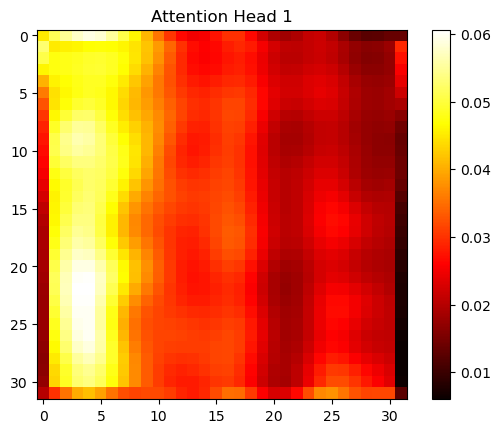

(32, 32)


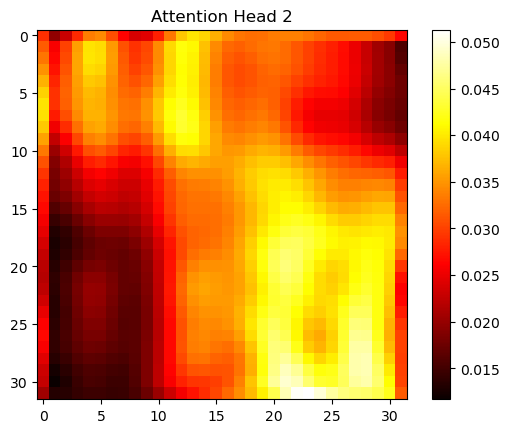

(32, 32)


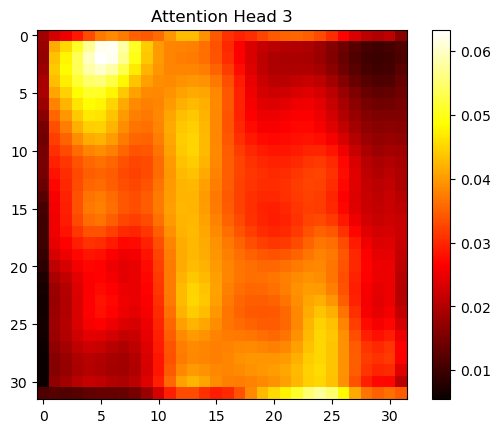

(32, 32)


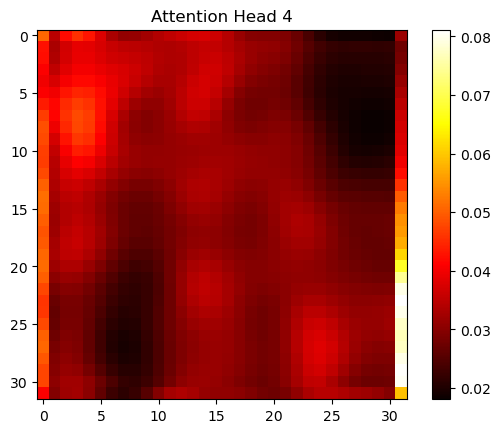

(32, 32)


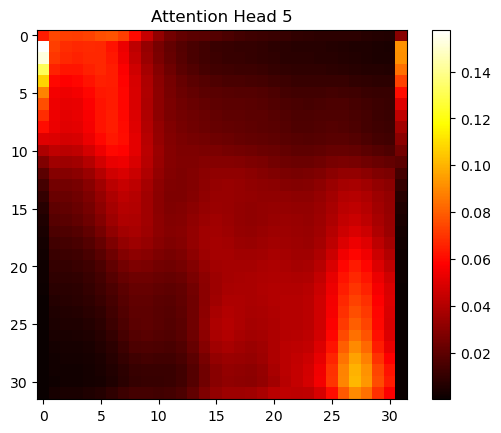

(32, 32)


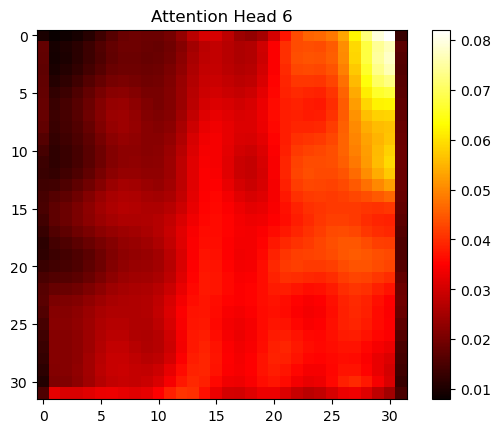

(32, 32)


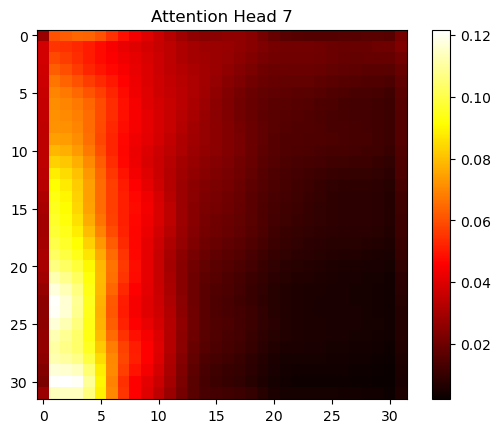

(32, 32)


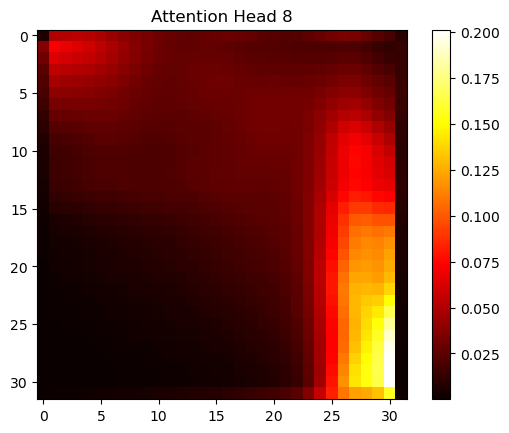

In [67]:
import torch
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
# 假设 attention_matrix 是你的注意力矩阵
attention_matrix = torch.randn(16, 8, 25, 25)
attention_matrix = torch.load("temp/series_sin.tc").cpu().detach()
# 取第一个 batch 的注意力矩阵
first_batch_attention = attention_matrix[0]

# 遍历八个头，绘制热力图
for head_index in range(8):
    # 取出一个头的注意力图
    attention_head = first_batch_attention[head_index].numpy()
    print(attention_head.shape)
    # 绘制热力图
    plt.imshow(attention_head, cmap='hot', interpolation='nearest')
    plt.title(f"Attention Head {head_index + 1}")
    plt.colorbar()
    plt.show()
    


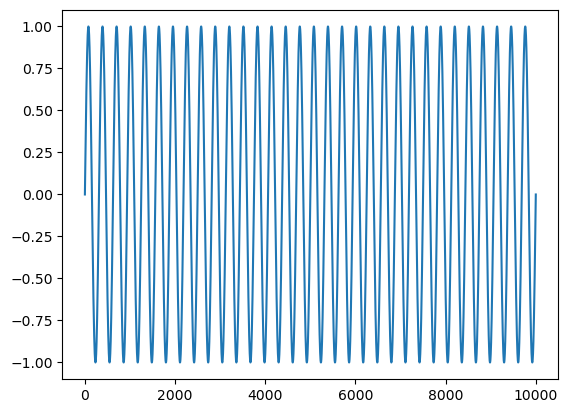

In [29]:
data = pd.read_csv("D:\\CODE\\github\\Anomaly-Transformer\\dataset\\sin_wave_data.csv")
plt.plot(data['Value'])

In [30]:
data = data['Value']

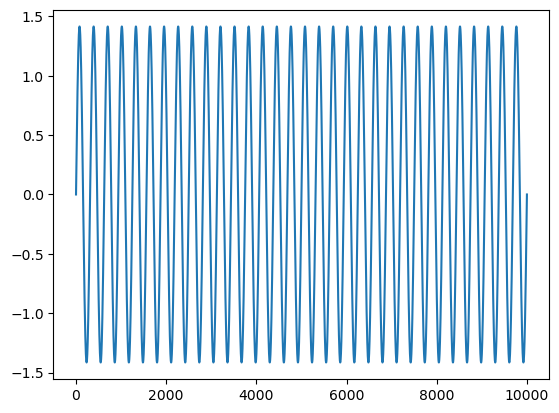

In [31]:
import numpy as np
data = np.array(data).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
plt.plot(data)

In [52]:
data = pd.read_csv("D:\\CODE\\github\\Anomaly-Transformer\\dataset\\sin_wave_data.csv")
data = data['Value']
ab_start = 9000
ab_end = 9100
data[ab_start:ab_end] = np.random.random(100)
test_labels = np.zeros((len(data),1))
test_labels[ab_start:ab_end] = 1
test_labels = test_labels[8000:]
test = data[8000:]

[-6.00722943e-01 -6.16676065e-01 -6.32379850e-01 ... -4.02055680e-02
 -2.01068490e-02 -7.84000000e-15]


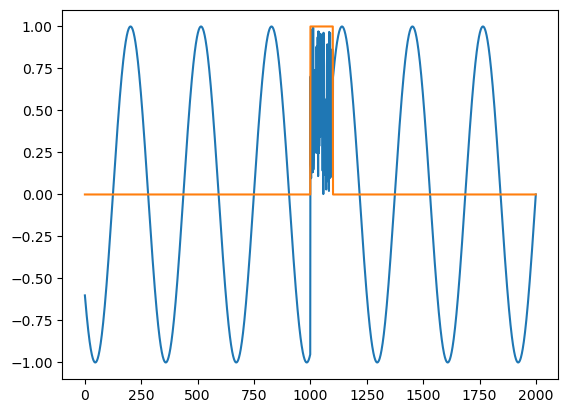

In [53]:
print(np.array(test))
plt.plot(np.array(test))
plt.plot(test_labels)


In [51]:
np.float32(test[1:10])

array([-0.6166761 , -0.63237983, -0.6478279 , -0.6630141 , -0.6779322 ,
       -0.69257617, -0.7069401 , -0.72101825, -0.73480487], dtype=float32)

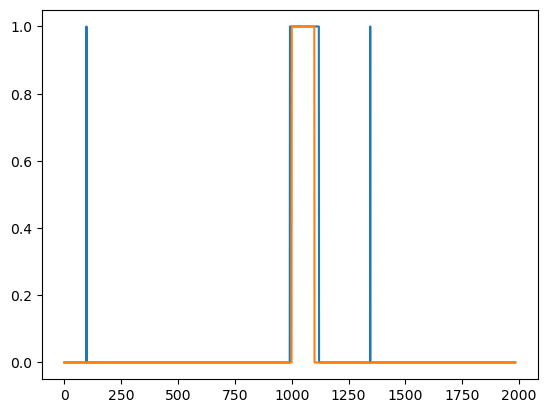

In [74]:
pred = np.load("temp/pred.npy")
gt = np.load("temp/gt.npy")
plt.plot(pred)
plt.plot(gt)

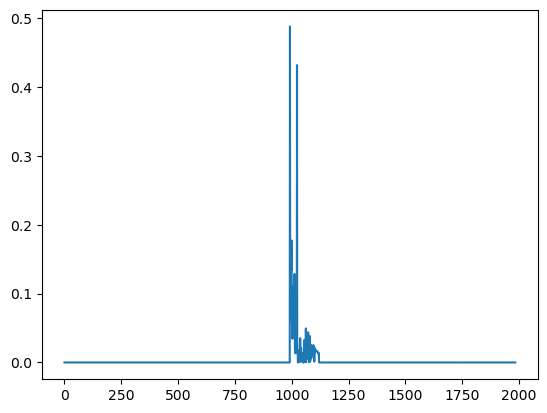

In [69]:
e = np.load("temp/sin_test_energy.npy")
plt.plot(e)

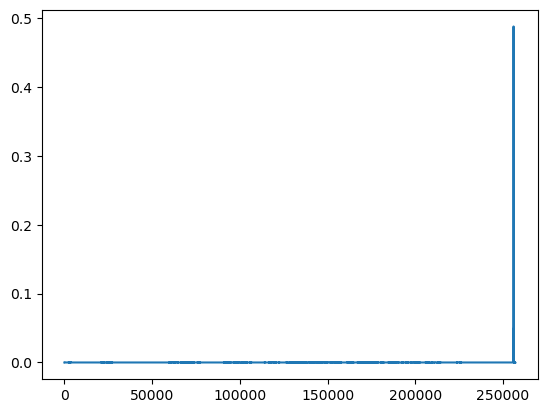

In [70]:
c = np.load("temp/combined_energy.npy")
plt.plot(c)

In [73]:
np.percentile(c, 100 - 0.1)

0.00013642361374513947